<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/demo_preprocessing_alldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp -r '/content/drive/MyDrive/Movies/data/mojo_japan/' '/content/'

!cp -r '/content/drive/MyDrive/Movies/data/metadata_filmarks/' '/content/'

In [148]:
!pip install japanize_matplotlib
import pandas as pd
import codecs 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import japanize_matplotlib

import warnings

import os
from tqdm import tqdm

#データのダウンロード

In [149]:
def read_data(dir, encode_type):
  output=pd.DataFrame()
  print(dir)
  files=os.listdir(dir)
  print(files)

  for file_ in files:
    if '2017' or '2018' or '2019' in file_: #収集できているファイル


      path = dir+file_
      print(path)
      with codecs.open(path, "r", encode_type, "ignore") as file:
          d = pd.read_csv(file, delimiter=",")
      
      output = pd.concat([output, d], axis=0)

  return output

In [150]:
metadata_dir='/content/metadata_filmarks/'
mojo_dir='/content/mojo_japan/'

data = read_data(metadata_dir, encode_type='utf-8')

/content/metadata_filmarks/
['data_2019_2020_12_16_204521.csv', 'data_2017_2020_11_25_015410.csv', 'data_2018_2020_12_14_020607.csv']
/content/metadata_filmarks/data_2019_2020_12_16_204521.csv
/content/metadata_filmarks/data_2017_2020_11_25_015410.csv
/content/metadata_filmarks/data_2018_2020_12_14_020607.csv


In [151]:
os.listdir(mojo_dir)

['data_2017.csv',
 'data_2019_2020_12_17_102319.csv',
 'data_2002_2020_12_17_101219.csv',
 'data_2007_2020_12_17_101219.csv',
 'data_2016_2020_12_17_101547.csv',
 'data_2012_2020_12_17_101219.csv',
 'data_2010_2020_12_17_102203.csv',
 'data_2015_2020_12_17_101219.csv',
 'data_2003_2020_12_17_101219.csv',
 'data_2005_2020_12_17_101219.csv',
 'data_2009_2020_12_17_101219.csv',
 'data_2013_2020_12_17_102223.csv',
 'data_2006_2020_12_17_101219.csv',
 'data_2011_2020_12_17_101219.csv',
 'data_2008_2020_12_17_101219.csv',
 'data_2017_2020_12_17_102319.csv',
 'data_2020_2020_12_17_102738.csv',
 'data_2004_2020_12_17_101219.csv',
 'data_2019.csv',
 'data_2014_2020_12_17_101219.csv',
 'data_2018.csv',
 'data_2018_2020_12_17_102449.csv']

In [152]:
mdata = read_data(mojo_dir, encode_type='shift-jis')

/content/mojo_japan/
['data_2017.csv', 'data_2019_2020_12_17_102319.csv', 'data_2002_2020_12_17_101219.csv', 'data_2007_2020_12_17_101219.csv', 'data_2016_2020_12_17_101547.csv', 'data_2012_2020_12_17_101219.csv', 'data_2010_2020_12_17_102203.csv', 'data_2015_2020_12_17_101219.csv', 'data_2003_2020_12_17_101219.csv', 'data_2005_2020_12_17_101219.csv', 'data_2009_2020_12_17_101219.csv', 'data_2013_2020_12_17_102223.csv', 'data_2006_2020_12_17_101219.csv', 'data_2011_2020_12_17_101219.csv', 'data_2008_2020_12_17_101219.csv', 'data_2017_2020_12_17_102319.csv', 'data_2020_2020_12_17_102738.csv', 'data_2004_2020_12_17_101219.csv', 'data_2019.csv', 'data_2014_2020_12_17_101219.csv', 'data_2018.csv', 'data_2018_2020_12_17_102449.csv']
/content/mojo_japan/data_2017.csv
/content/mojo_japan/data_2019_2020_12_17_102319.csv
/content/mojo_japan/data_2002_2020_12_17_101219.csv
/content/mojo_japan/data_2007_2020_12_17_101219.csv
/content/mojo_japan/data_2016_2020_12_17_101547.csv
/content/mojo_japan/

In [153]:
mdata[mdata['Title(ja)'].isnull()==False]

,Rank,Title,Title(ja),Theaters,Release Date,Distributor,Gross,Total Gross,url,age,Filmarks URL
0,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/61335
1,2,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,Toho-Towa\n\n,"$64,950,363","$66,229,119",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/71583
2,3,Pirates of the Caribbean: Dead Men Tell No Tales,パイレーツ・オブ・カリビアン/最後の海賊,-,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/56771
3,4,Your Name.,君の名は,301,Toho\n\n,Toho\n\n,"$49,762,752","$233,794,134",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/65931
4,5,Moana,モアナと伝説の海,568,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/60104
...,...,...,...,...,...,...,...,...,...,...,...
175,176,Wonder Wheel,女と男の観覧車,13,-,none,"$15,269","$494,739",https://www.boxofficemojo.com/year/2018/?area=...,2018.0,https://filmarks.com/movies/74695
176,177,A Dog's Purpose,僕のワンダフル・ライフ,312,Toho-Towa\n\n,Toho-Towa\n\n,"$5,678","$8,119,759",https://www.boxofficemojo.com/year/2018/?area=...,2018.0,https://filmarks.com/movies/69145
177,178,Thor: Ragnarok,マイティ・ソー バトルロイヤル,-,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$2,700","$10,116,575",https://www.boxofficemojo.com/year/2018/?area=...,2018.0,https://filmarks.com/movies/73802
178,179,Logan Lucky,ローガン・ラッキー,306,-,none,"$2,448","$1,912,788",https://www.boxofficemojo.com/year/2018/?area=...,2018.0,https://filmarks.com/movies/70044


In [154]:
mdata = mdata.rename(columns={'Filmarks URL':'URL'}) 

#各データをマージ

In [155]:
df = data.merge(mdata, how='left',on='URL').reset_index(drop=True)

#穴埋め

In [156]:
df.loc[df['上映日：製作国：上映時間']=='上映日：2016年12月10日 ／ 上映時間：89分', '上映日：製作国：上映時間']='上映日：2016年12月10日 ／ 製作国 : 日本 ／ 上映時間：89分'
df.loc[df['上映日：製作国：上映時間']=='上映日：2018年04月13日製作国：日本上映時間：110分','上映日：製作国：上映時間']='上映日：2018年04月13日 ／ 製作国：日本 ／ 上映時間：110分'

#削除したい列を削除

In [157]:
drop_cols=[
           'url','Release Date','タイトル(日本名)','タイトル(英名)', 
           'header情報',  'あらすじ'
]
df = df.drop(drop_cols, axis=1) 

In [158]:
df[df['Title(ja)'].duplicated()].sort_values(by='Title(ja)')

,レビュー数,平均スコア,製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title(ja),Theaters,Distributor,Gross,Total Gross,age
341,24259件,3.6点,2017年,上映日：2017年03月18日 ／ 製作国：日本 ／ 上映時間：138分,NaN,NaN,NaN,製作国：日本,138.0,NaN,['大友啓史'],"['岩下悠子', '渡部亮平', '大友啓史']",['羽海野チカ'],"['大友啓史', '岩下悠子', '渡部亮平', '大友啓史', '羽海野チカ', 'ぼくの...",https://filmarks.com/movies/67235,139,March Comes in Like a Lion,3月のライオン 前編,-,Toho\n\n,"$1,172,600","$1,172,600",2017.0
340,24259件,3.6点,2017年,上映日：2017年03月18日 ／ 製作国：日本 ／ 上映時間：138分,NaN,NaN,NaN,製作国：日本,138.0,NaN,['大友啓史'],"['岩下悠子', '渡部亮平', '大友啓史']",['羽海野チカ'],"['大友啓史', '岩下悠子', '渡部亮平', '大友啓史', '羽海野チカ', 'ぼくの...",https://filmarks.com/movies/67235,109,March Comes in Like a Lion 2,3月のライオン 前編,296,Toho\n\n,"$2,745,799","$2,745,799",2017.0
309,24259件,3.6点,2017年,上映日：2017年03月18日 ／ 製作国：日本 ／ 上映時間：138分,NaN,NaN,NaN,製作国：日本,138.0,NaN,['大友啓史'],"['岩下悠子', '渡部亮平', '大友啓史']",['羽海野チカ'],"['大友啓史', '岩下悠子', '渡部亮平', '大友啓史', '羽海野チカ', 'ぼくの...",https://filmarks.com/movies/67235,139,March Comes in Like a Lion,3月のライオン 前編,-,Toho\n\n,"$1,172,600","$1,172,600",2017.0
446,32480件,3.7点,2017年,上映日：2017年12月16日製作国：日本上映時間：119分,NaN,NaN,NaN,製作国：日本上映時間：119分,119.0,ドラマ恋愛,['瀬々敬久（鈴木俊久）'],['岡田惠和'],[],"['瀬々敬久（鈴木俊久）', '岡田惠和', 'back number', '佐藤健', '...",https://filmarks.com/movies/71372,61,The 8-Year Engagement,8年越しの花嫁 奇跡の実話,-,Shochiku\n\n,"$7,340,861","$23,896,573",2017.0
447,32480件,3.7点,2017年,上映日：2017年12月16日製作国：日本上映時間：119分,NaN,NaN,NaN,製作国：日本上映時間：119分,119.0,ドラマ恋愛,['瀬々敬久（鈴木俊久）'],['岡田惠和'],[],"['瀬々敬久（鈴木俊久）', '岡田惠和', 'back number', '佐藤健', '...",https://filmarks.com/movies/71372,44,The 8-Year Engagement,8年越しの花嫁 奇跡の実話,-,Shochiku\n\n,"$8,347,674","$23,896,573",2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,500件,3.3点,2018年,上映日：2018年12月14日製作国：日本上映時間：100分,NaN,NaN,NaN,製作国：日本上映時間：100分,100.0,アニメ,['高橋滋春'],['日野晃博'],[],"['高橋滋春', '日野晃博', '種﨑敦美', '木村良平', '東山奈央', '小桜エツ...",https://filmarks.com/movies/79941,124,Yo-kai Watch: Forever Friends,映画 妖怪ウォッチ FOREVER FRIENDS,-,Toho\n\n,"$1,219,131","$10,336,365",2018.0
536,499件,3.3点,2018年,上映日：2018年12月14日製作国：日本上映時間：100分,NaN,NaN,NaN,製作国：日本上映時間：100分,100.0,アニメ,['高橋滋春'],['日野晃博'],[],"['高橋滋春', '日野晃博', '種﨑敦美', '木村良平', '東山奈央', '小桜エツ...",https://filmarks.com/movies/79941,124,Yo-kai Watch: Forever Friends,映画 妖怪ウォッチ FOREVER FRIENDS,-,Toho\n\n,"$1,219,131","$10,336,365",2018.0
275,649件,3.1点,2017年,上映日：2017年12月16日 ／ 製作国：日本 ／ 上映時間：94分,NaN,NaN,NaN,製作国：日本,94.0,アニメ,[],['日野晃博'],[],"['日野晃博', '戸松遥', '関智一', '小桜エツコ', '上白石萌音', '千葉雄大...",https://filmarks.com/movies/73894,87,Yo-Kai Watch 4,映画 妖怪ウォッチ シャドウサイド 鬼王の復活,-,Toho\n\n,"$3,384,257","$17,330,669",2018.0
496,653件,3.1点,2017年,上映日：2017年12月16日製作国：日本上映時間：94分,NaN,NaN,NaN,製作国：日本上映時間：94分,94.0,アニメ,[],['日野晃博'],[],"['日野晃博', '戸松遥', '関智一', '小桜エツコ', '上白石萌音', '千葉雄大...",https://filmarks.com/movies/73894,75,Yo-Kai Watch 4,映画 妖怪ウォッチ シャドウサイド 鬼王の復活,-,Toho\n\n,"$6,088,190","$17,330,669",2017.0


In [159]:
def preprocess(input_df: pd.DataFrame) -> pd.DataFrame:
  output_df = input_df.copy()
  #興行収入 
  output_df['Gross'] = output_df['Gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)
  output_df['Total Gross'] = output_df['Total Gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)
  #監督
  output_df['directors'] = output_df['監督'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                               .replace(' ',''))
                
  output_df['writers'] = output_df['脚本'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                               .replace(' ',''))
  output_df['casts'] = output_df['キャスト'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                               .replace(' ',''))
                                                                
  #output_df=output_df.drop([
  #            '監督','脚本','キャスト',
  #], axis=1)
  return output_df

In [160]:
df = preprocess(df)
df = df.reset_index(drop=True)

In [161]:
#castの列には監督なども入ってしまっている!!!
casts = ''
for c in df['casts'].values:
    casts += c+',' 

casts_s = list(casts.replace(' ','').split(','))
casts_s = pd.Series(casts_s)

In [162]:
casts_s.value_counts()

関智一            21
櫻井孝宏           19
山寺宏一           16
ブラッドリー・クーパー    16
山崎貴            15
               ..
コムアイ            1
ジェームス・ブロアー      1
斉藤秀翼            1
ビクトリア・モロールズ     1
                1
Length: 4757, dtype: int64

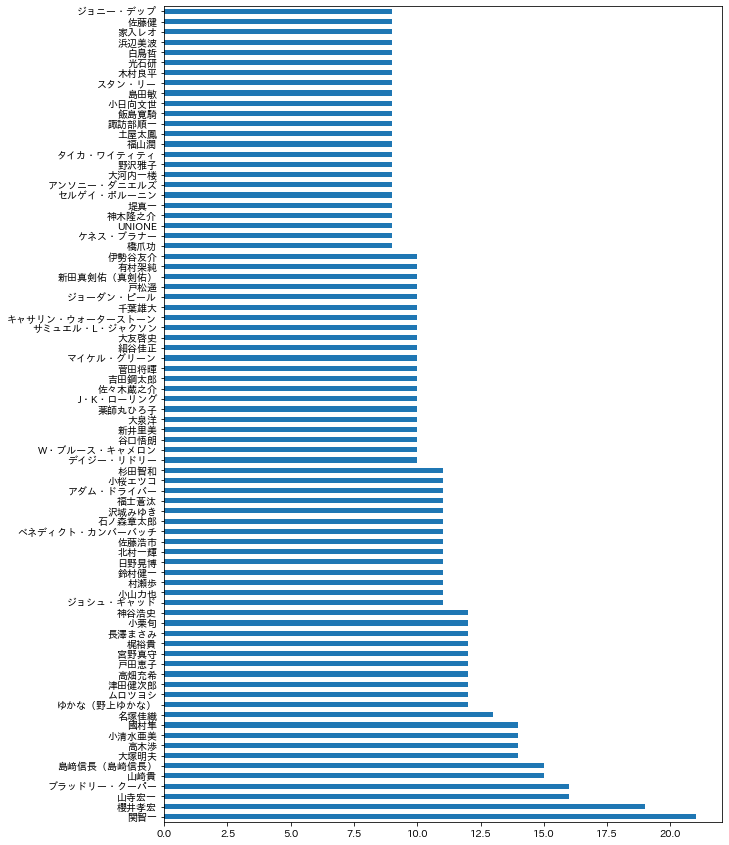

In [163]:
casts_s.value_counts().head(80).plot(kind='barh',figsize=(10,15))

In [164]:
"""
#castの列には監督なども入ってしまっている!!!
casts = ''
for c in df['casts'].values:
    casts += c+',' 

casts_list = list(set(casts.split(',')))

#pickle化
pd.to_pickle(casts_list, '/content/drive/MyDrive/Movies/preprocessed/people.pkl')

"""

"\n#castの列には監督なども入ってしまっている!!!\ncasts = ''\nfor c in df['casts'].values:\n    casts += c+',' \n\ncasts_list = list(set(casts.split(',')))\n\n#pickle化\npd.to_pickle(casts_list, '/content/drive/MyDrive/Movies/preprocessed/people.pkl')\n\n"

In [165]:
"""
#castsのOne-Hot-Encoding
for i, cast in enumerate(casts_list):
    #if cast in data['casts'].loc[i]:
    df[str(cast)] = False

for idx in range(len(df['casts'].values)):
    for c in casts_list:
      if c in df['casts'].loc[idx]:
        #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
        # c, df['casts'].loc[idx], df[str(c)].loc[idx]))
        df[str(c)].loc[idx] = True

#キャストだけのdfを作る
casts_df=pd.DataFrame()
for c in df.columns:
  if df[c].dtype == bool :
    df[c] = df[c].astype(int)
    casts_df = pd.concat([casts_df, df[c]], axis=1)
"""

"\n#castsのOne-Hot-Encoding\nfor i, cast in enumerate(casts_list):\n    #if cast in data['casts'].loc[i]:\n    df[str(cast)] = False\n\nfor idx in range(len(df['casts'].values)):\n    for c in casts_list:\n      if c in df['casts'].loc[idx]:\n        #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(\n        # c, df['casts'].loc[idx], df[str(c)].loc[idx]))\n        df[str(c)].loc[idx] = True\n\n#キャストだけのdfを作る\ncasts_df=pd.DataFrame()\nfor c in df.columns:\n  if df[c].dtype == bool :\n    df[c] = df[c].astype(int)\n    casts_df = pd.concat([casts_df, df[c]], axis=1)\n"

In [166]:
class BaseBlock(object):
    def fit(self, input_df, y=None):
        return self.transform(input_df)

    def transform(self, input_df):
        raise NotImplementedError()

In [167]:
class preprocess_casts(BaseBlock):
  def __init__(self, whole_df:pd.DataFrame()):
    self.whole_df = whole_df

  def transform(self, input_df):
    casts = ''
    for c in self.whole_df['casts'].values:
        casts += c+',' 

    casts_list = list(set(casts.split(',')))

    #pickle化
    casts_list.remove('')
    pd.to_pickle(casts_list, '/content/drive/MyDrive/Movies/preprocessed/people.pkl') 

    #castsのOne-Hot-Encoding
    for i, cast in enumerate(casts_list):
        #if cast in data['casts'].loc[i]:
        input_df[str(cast)] = False

    for idx in tqdm(range(len(input_df['casts'].values))):
        for c in casts_list:
          if c in input_df['casts'].loc[idx]:
            #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
            # c, input_df['casts'].loc[idx], input_df[str(c)].loc[idx]))
            input_df[str(c)].loc[idx] = True

    #キャストだけのdfを作る
    output_df=pd.DataFrame()
    for c in input_df.columns:
      if input_df[c].dtype == bool :
        input_df[c] = input_df[c].astype(int)
        output_df = pd.concat([output_df, input_df[c]], axis=1).reset_index(drop=True)
    
    return output_df

In [168]:
#assert len(df) == len(preprocess_casts(whole_df=df).fit(df))

In [169]:
cast_df = preprocess_casts(whole_df=df).fit(df)

  0%|          | 0/604 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 604/604 [00:48<00:00, 12.40it/s]


In [170]:
cast_df.reset_index(drop=True)

,沢海陽子,伊藤美紀,ブリジット・ランディ=ペイン,ケイシー・アフレック,関ジャニ∞,スティーヴン・ヘンダーソン,栗田貫一,FrédéricAnscombre,グレアム・グリーン,増田俊樹,ザック・ウッズ,吉田鋼太郎,黒沢ともよ,ピーター・クレイグ,麻生周一,イアン・ボーエン,古屋兎丸,吉田栄作,多田野曜平,ジェニファー・クーリッジ,柚月裕子,松本美和,フィリップ･ラショー,松岡禎丞,高橋のぼる,島﨑信長（島崎信長）,橋本環奈,長峯達也,TWICE,ジョン・ワッツ,丑尾健太郎,筧美和子,アンソニー・ラモス,和田正人,ライアン・フレック,不破万作,マイケル・ジェームズ・ショウ,北川里奈,バリー・ジェンキンス,福井美樹,...,矢田亜希子,ダニー・ボイル,藤井道人,水谷豊,ジョン・バーンサル,ロバート・ジョン・バーク,山下健二郎,小澤征悦,東地宏樹,小野大輔,カイル・バルタ,遠藤史也,蜷川実花,八津弘幸,ジョン・クラシンスキー,高橋優,芦屋小雁,パディ・コンシダイン,岩松了,高橋英樹,アンドリュー・バラー,堺雅人,左時枝,チャーリー・パーマー・ロースウェル,千葉紗子,スティーブン・クォーレ,ジェームズ・アーバニアク,トニー・シリコ,ロバート・レッドフォード,ジャック・マクブレイヤー,イヴ・ヒューソン,シュリー・クルックス,小山茉美（小山まみ）,ジミー・リー,キーファー・サザーランド,adieu,玉木宏,デクスター・フレッチャー,アンジェイ・ヒラ,バーン・コラコ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
#pd.read_pickle('/content/drive/MyDrive/Movies/preprocessed/people.pkl') 

In [172]:
!pip install texthero
!pip install textdistance

In [173]:
from nltk.util import ngrams

def line_ngram(line, n=2):
  words = [w for w in line.split(' ') if len(w) != 0]
  return list(ngrams(words, n))


import texthero as hero
from texthero import preprocessing

def clearn_by_hero(x):
    custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords
                  ]
    return hero.clean(x, custom_pipeline)

def create_n_gram(x, flg=False, n=3):
    if flg==True:
      x = clearn_by_hero(x)
    x = pd.Series(x).map(lambda r: line_ngram(r, n=n))
    return x

class NGramBlock(BaseBlock):
    def __init__(self, whole_df, TARGET_COL, flg=True, n=3, threshold=20):
        self.whole_df = whole_df
        self.TARGET_COL = TARGET_COL   #ngramの処理を行うカラム
        self.flg=flg                   #テキスト処理を行うかどうか
        self.n = n                     #ngramのn
        self.threshold = threshold     #ペアうち何回以上出現するペアを採用するか
        
    def fit(self, input_df, y=None):
        ngrams = create_n_gram(self.whole_df[self.TARGET_COL], self.flg, n=self.n)
        grams = [x for row in ngrams for x in row if len(x) > 0]
        print(f'{self.n}-grams:threshold{self.threshold}')
        #top_grams = pd.Series(grams).value_counts().head(self.threshold).index
        top_grams = pd.Series(grams).value_counts()
        top_grams = top_grams[top_grams>self.threshold].index
        self.top_grams_ = top_grams
        return self.transform(input_df)

    def transform(self, input_df):
        ngrams = create_n_gram(input_df[self.TARGET_COL], n=self.n)
        output_df = pd.DataFrame()

        for top in self.top_grams_:
            s_top = '-'.join(top)
            output_df[f'{s_top}'] = ngrams.map(lambda x: top in x).map(int)

        return output_df.add_prefix('ngrams_feature_words-').add_suffix(f'_n={self.n}')

In [174]:
member=df['casts'].apply(lambda x: x.replace(',',' '))

In [175]:
name_grams = member.map(line_ngram)
grams = [x for row in name_grams for x in row if len(x) > 0]

In [176]:
idx=pd.Series(grams).value_counts()#.head(100).plot(kind='barh', figsize=(10,20))
idx[idx>2]

(櫻井孝宏, 名塚佳織)      9
(村瀬歩, 大塚明夫)       9
(家入レオ, UNIONE)    9
(白鳥哲, 新井里美)       9
(小清水亜美, 白鳥哲)      9
                 ..
(廣瀬智紀, 松田凌)       3
(山下健二郎, 佐藤寛太)     3
(新海誠, 新海誠)        3
(平川大輔, 宮野真守)      3
(松本梨香, 大谷育江)      3
Length: 467, dtype: int64

In [177]:
df['casts'] = df['casts'].apply(lambda x: x.replace(',',' '))
block = NGramBlock(df, 'casts', flg=False, n=3, threshold=3)
block.fit(df).head()

3-grams:threshold3


,ngrams_feature_words-小清水亜美-白鳥哲-新井里美_n=3,ngrams_feature_words-家入レオ-UNIONE-ゆかな（野上ゆかな）_n=3,ngrams_feature_words-UNIONE-ゆかな（野上ゆかな）-櫻井孝宏_n=3,ngrams_feature_words-谷口悟朗-大河内一楼-家入レオ_n=3,ngrams_feature_words-櫻井孝宏-名塚佳織-小清水亜美_n=3,ngrams_feature_words-戸田恵子-村瀬歩-大塚明夫_n=3,ngrams_feature_words-大河内一楼-家入レオ-UNIONE_n=3,ngrams_feature_words-島﨑信長（島崎信長）-高木渉-津田健次郎_n=3,ngrams_feature_words-大塚明夫-島﨑信長（島崎信長）-高木渉_n=3,ngrams_feature_words-名塚佳織-小清水亜美-白鳥哲_n=3,ngrams_feature_words-白鳥哲-新井里美-戸田恵子_n=3,ngrams_feature_words-ゆかな（野上ゆかな）-櫻井孝宏-名塚佳織_n=3,ngrams_feature_words-新井里美-戸田恵子-村瀬歩_n=3,ngrams_feature_words-村瀬歩-大塚明夫-島﨑信長（島崎信長）_n=3,ngrams_feature_words-J・K・ローリング-J・K・ローリング-エディ・レッドメイン_n=3,ngrams_feature_words-デヴィッド・イェーツ-J・K・ローリング-J・K・ローリング_n=3,ngrams_feature_words-戸松遥-関智一-小桜エツコ_n=3,ngrams_feature_words-松本享恭-岩永徹也-松田るか_n=3,ngrams_feature_words-瀬戸利樹-松本享恭-岩永徹也_n=3,ngrams_feature_words-日野晃博-戸松遥-関智一_n=3,ngrams_feature_words-サラ・シルヴァーマン-ガル・ガドット-タラジ・P・ヘンソン_n=3,ngrams_feature_words-ジェーン・リンチ-アラン・テュディック-アルフレッド・モリナ_n=3,ngrams_feature_words-堀部圭亮-古舘寛治-杉本哲太_n=3,ngrams_feature_words-アイラ・フィッシャー-ローラ・リニー-エリー・バンバー_n=3,ngrams_feature_words-倉科カナ-清原果耶-佐々木蔵之介_n=3,ngrams_feature_words-高田夏帆-瀬戸利樹-松本享恭_n=3,ngrams_feature_words-エウヘニオ・デルベス-セルゲイ・ポルーニン-ミスティ・コープランド_n=3,ngrams_feature_words-スタン・リー-レイ・スティーヴンソン-サム・ニール_n=3,ngrams_feature_words-滝裕可里-関智一-三浦涼介_n=3,ngrams_feature_words-福原遥-村中知-藤田咲_n=3,ngrams_feature_words-堺雅人-高畑充希-堤真一_n=3,ngrams_feature_words-前田吟-高橋一生-岩松了_n=3,ngrams_feature_words-ピーター・メイヒュー-ベロニカ・グゥ-ジミー・リー_n=3,ngrams_feature_words-草尾毅-山寺宏一-森田成一_n=3,ngrams_feature_words-ジョン・オーティス-ジョシュ・ギャッド-ジュリエット・ライランス_n=3,ngrams_feature_words-トム・ホランダー-アレン・リーチ-グウィリム・リー_n=3,ngrams_feature_words-W・ブルース・キャメロン-デニス・クエイド-K・J・アパ_n=3,ngrams_feature_words-日野晃博-種﨑敦美-木村良平_n=3,ngrams_feature_words-エリー・バンバー-ミランダ・ハート-ジャック・ホワイトホール_n=3,ngrams_feature_words-R・バルキ-アクシャイ・クマール-ソーナム・カプール_n=3,...,ngrams_feature_words-アリソン・スドル-ダン・フォグラー-ジュード・ロウ_n=3,ngrams_feature_words-シルヴィア・フークス-カーラ・ジュリ-マッケンジー・デイビス_n=3,ngrams_feature_words-フルーラ・ボーグ-ティモシー・シモンズ-アリ・ウォン_n=3,ngrams_feature_words-山崎貴-山崎貴-西岸良平_n=3,ngrams_feature_words-佐藤健-土屋太鳳-北村一輝_n=3,ngrams_feature_words-ルピタ・ニョンゴ-アンソニー・ダニエルズ-ワーウィック・デイヴィス_n=3,ngrams_feature_words-スコット・ヘイズ-リード・スコット-ウディ・ハレルソン_n=3,ngrams_feature_words-ヤーロウ・チェイニー-スコット・モシャー-マイケル・ルシュール_n=3,ngrams_feature_words-レベッカ・ブラント-ファラ・マッケンジー-チャニング・テイタム_n=3,ngrams_feature_words-サム・ニール-ルー・フェリグノ-浅野忠信_n=3,ngrams_feature_words-黒崎レイナ-甲斐翔真-土屋シオン_n=3,ngrams_feature_words-ボーデン・ジョンストン-サットン・ジョンストン-デヴィッド・デンマン_n=3,ngrams_feature_words-ライアン・ジョンソン-マーク・ハミル-キャリー・フィッシャー_n=3,ngrams_feature_words-ブリット・ロバートソン-ペギー・リプトン-ジョン・オーティス_n=3,ngrams_feature_words-タラジ・P・ヘンソン-ジャック・マクブレイヤー-ジェーン・リンチ_n=3,ngrams_feature_words-ドゥニ・ヴィルヌーヴ-ハンプトン・ファンチャー-マイケル・グリーン_n=3,ngrams_feature_words-ぼくのりりっくのぼうよみ-神木隆之介-染谷将太_n=3,ngrams_feature_words-ジュリエット・ライランス-ルーク・カービー-プーチ・ホール_n=3,ngrams_feature_words-デイジー・リドリー-オスカー・アイザック-アンディ・サーキス_n=3,ngrams_feature_words-ユアン・マクレガー-ヘイリー・アトウェル-マーク・ゲイティス_n=3,ngrams_feature_words-西銘駿-赤楚衛二-高田夏帆_n=3,ngrams_feature_words-エイミー・アダムス-ジェイク・ギレンホール-マイケル・シャノン_n=3,ngrams_feature_words-山寺宏一-森田成一-宝亀克寿_n=3,ngrams_feature_words-薬師丸ひろ子-吉行和子-橋爪功_n=3,ngrams_feature_words-タイカ・ワイティティ-クランシー・ブラウン-ジェイミー・アレクサンダー_n=3,ngrams_feature_words-ハンプトン・ファンチャー-マイケル・グリーン-ライアン・ゴズリング_n=3,ngrams_feature_words-関智一-三浦涼介-田中卓志_n=3,ngrams_feature_words-飯島寛騎-渡部秀-福士蒼汰_n=3,ngrams_feature_words-オリヴィエ・マルティネス-ジョアンヌ・ウォーリー-ジョン・リンチ_n=3,ngrams_feature_words-ラディカ・アプテ-SaurabhAgarwal-アミターブ・バッチャン_n=3,ngrams_feature_words-韓英恵-竜雷太-綾戸智恵_n=3,ngrams_feature_words-ジム・カヴィーゼル-ジェームズ・フォークナー-オリヴィエ・マルティネス_n=3,ngrams_feature_words-鳥山明-鳥山明-三浦大知_n=3,ngrams_feature_words-古川登志夫-草尾毅-山寺宏一_n=3,ngrams_feature_words-アニーシュ・チャガンティ-アニーシュ・チャガンティ-セブ・オハニアン_n=3,ngrams_feature_words-宇野祥平-韓英恵-竜雷太_n=3,ngrams_feature_words-柳喬之-滝裕可里-関智一_n=3,ngrams_feature_words-ベニチオ・デル・トロ-グェンドリン・クリスティー-ローラ・ダーン_n=3,ngrams_feature_words-ローラ・リニー-エリー・バンバー-カール・グルスマン_n=3,ngrams_feature_words-R・バルキ-R・バルキ-アクシャイ・クマール_n=3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#ジャンルに関して

In [178]:
class preprocess_genre(BaseBlock):
  def __init__(self, all_df:pd.DataFrame):
    self.all_df = all_df 
  
  def transform(self, input_df):
    #output_df = pd.DataFrame()
    #Filmarksのジャンル分けは以下の通り
    Genres = [
    "SF","ドラマ","恋愛","ホラー","戦争","音楽","ミュージカル",
    "青春", "コメディ", "アクション", "アドベンチャー・冒険",
    "クライム", "バイオレンス", "サスペンス","ミステリー", 
    "ファミリー", "ファンタジー", "スリラー","歴史", "時代劇", "西部劇","伝記",
    "パニック", "オムニバス","ドキュメンタリー","スポーツ", "単発ドラマ",
    "不明" ###欠損値用
            ]
    self.all_df['ジャンル'] = self.all_df['ジャンル'].fillna('UNKNOWN')

    for i, G in enumerate(Genres):
      self.all_df['ジャンル_'+str(G)] = False

    for idx in range(len(self.all_df['ジャンル'].values)):
        for G in Genres:
            if G in self.all_df['ジャンル'].loc[idx]:
                self.all_df['ジャンル_'+str(G)].loc[idx] = True

    genres=[c for c in self.all_df.columns if 'ジャンル_' in c ]
    output_df = self.all_df[genres].astype(int)
    
    idx = pd.Series(output_df[genres].sum(axis=0))
    target = idx[idx>0].index.values[0:]
    output_df = output_df[target]

    return output_df

In [179]:
genres_df = preprocess_genre(all_df=df).fit(df)
genres_df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ジャンル_SF,ジャンル_ドラマ,ジャンル_恋愛,ジャンル_ホラー,ジャンル_戦争,ジャンル_音楽,ジャンル_ミュージカル,ジャンル_青春,ジャンル_コメディ,ジャンル_アクション,ジャンル_アドベンチャー・冒険,ジャンル_クライム,ジャンル_バイオレンス,ジャンル_サスペンス,ジャンル_ミステリー,ジャンル_ファミリー,ジャンル_ファンタジー,ジャンル_スリラー,ジャンル_歴史,ジャンル_時代劇,ジャンル_西部劇,ジャンル_伝記,ジャンル_パニック,ジャンル_オムニバス,ジャンル_ドキュメンタリー,ジャンル_スポーツ
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##output:genres_df

In [180]:
#df['年(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[0].replace('上映日：','').split('年')[0])
#df['月(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[0].replace('上映日：','').split('年')[1].split('月')[0])
#df['日(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[0].replace('上映日：','').split('年')[1].split('月')[1])

#df['製作国'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace(' ','').split('／')[1].replace('製作国:','').replace('製作国：',''))

#上映日：製作国：上映時間の前処理

In [181]:
import re 
t = '上映日：2016年1月1日 ／ 製作国 : 日本 '#／ 上映時間：89分'
t = '製作国 : 日本 '
if '上映日：' in t:
  print(re.findall('上映日：(.*?) ', t))
  ymd_ = re.findall('上映日：(.*?) ', t)[0]
  year_ = int(re.findall(r'\d{4}年',ymd_)[0].replace('年',''))
  month_ = int(re.findall(r'\d{1,2}月',ymd_)[0].replace('月',''))
  day_ = int(re.findall(r'\d{1,2}日',ymd_)[0].replace('日',''))

  #print(year, month, day)
if '上映時間：' in t:
  print(re.findall('上映時間：(.*)', t))
  time_ = int(re.findall('上映時間：(.*)', t)[0].replace('分',''))
  print(time_)
if '製作国 : ' in t:
  print(re.findall('製作国 : (.*?) ', t))
  country=re.findall('製作国 : (.*?) ', t)[0]
  print(country)

['日本']
日本


In [182]:
re.findall('製作国 : (.*?) ', t), re.findall('上映時間：(.*)', t)

(['日本'], [])

#製作国の前処理

In [183]:
import re 

class preprocess_release_day_and_place(BaseBlock):
  def __init__(self, all_df:pd.DataFrame):
    self.all_df = all_df 
  
  def transform(self, input_df):
    #output_df = pd.DataFrame()
    self.all_df['上映日：製作国：上映時間'] = self.all_df['上映日：製作国：上映時間'].fillna('UNKNOWN')
    self.all_df['Opening_Day'] = np.nan
    self.all_df['Opening_Day:Day'] = np.nan
    self.all_df['Opening_Day:Month'] = np.nan   
    self.all_df['Opening_Day:Year'] = np.nan
    self.all_df['Time'] = np.nan
    self.all_df['Country'] = np.nan

    for i in range(len(self.all_df)):
      ymd_=np.nan; year_=np.nan; month_=np.nan 
      day_=np.nan; time_=np.nan; country_=np.nan
      print(self.all_df.loc[i,'上映日：製作国：上映時間'])

      t = self.all_df.loc[i,'上映日：製作国：上映時間']
      if '上映日：' in t:
        #print(re.findall('上映日：(.*?) ', t))
        ymd_ = re.findall('上映日：(.*?) ', t)[0]
        year_ = int(re.findall(r'\d{4}年',ymd_)[0].replace('年',''))
        month_ = int(re.findall(r'\d{1,2}月',ymd_)[0].replace('月',''))
        day_ = int(re.findall(r'\d{1,2}日',ymd_)[0].replace('日',''))

        #print(year, month, day)
      if '上映時間：' in t:
        #print(re.findall('上映時間：(.*)', t))
        time_ = int(re.findall('上映時間：(.*)', t)[0].replace('分',''))
        #print(time_)
      if '製作国：' in t:
        #print(re.findall('製作国 : (.*?) ', t))
          country_=re.findall('製作国：(.*?) ', t)[0] #製作国名の後の空白が半角
        #print(country)
      self.all_df.loc[i,'Opening_Day'] = ymd_
      self.all_df.loc[i,'Opening_Day:Day'] = day_
      self.all_df.loc[i,'Opening_Day:Month'] = month_   
      self.all_df.loc[i,'Opening_Day:Year'] = year_
      self.all_df.loc[i,'Time'] = time_
      self.all_df.loc[i,'Country'] = country_  

    return self.all_df[['Opening_Day','Opening_Day:Day','Opening_Day:Month',
                        'Opening_Day:Year','Time','Country']]

In [184]:
"""

t = ' 上映日：2019年05月10日 ／ 製作国：日本 ／ 上映時間：127分'
if '上映日：' in t:
  ymd_ = re.findall('上映日：(.*?) ', t)[0]
  print(ymd_)
  year_ = int(re.findall(r'\d{4}年',ymd_)[0].replace('年',''))
  month_ = int(re.findall(r'\d{1,2}月',ymd_)[0].replace('月',''))
  day_ = int(re.findall(r'\d{1,2}日',ymd_)[0].replace('日',''))

  print(year_, month_, day_)
if '上映時間：' in t:
  time_ = int(re.findall('上映時間：(.*)', t)[0].replace('分',''))
  print(time_)
if '製作国：' in t:
  #print(re.findall('製作国：(.*?) ', t))
  country_=re.findall('製作国：(.*?) ', t)[0]
  print(country_)

"""

"\n\nt = ' 上映日：2019年05月10日 ／ 製作国：日本 ／ 上映時間：127分'\nif '上映日：' in t:\n  ymd_ = re.findall('上映日：(.*?) ', t)[0]\n  print(ymd_)\n  year_ = int(re.findall(r'\\d{4}年',ymd_)[0].replace('年',''))\n  month_ = int(re.findall(r'\\d{1,2}月',ymd_)[0].replace('月',''))\n  day_ = int(re.findall(r'\\d{1,2}日',ymd_)[0].replace('日',''))\n\n  print(year_, month_, day_)\nif '上映時間：' in t:\n  time_ = int(re.findall('上映時間：(.*)', t)[0].replace('分',''))\n  print(time_)\nif '製作国：' in t:\n  #print(re.findall('製作国：(.*?) ', t))\n  country_=re.findall('製作国：(.*?) ', t)[0]\n  print(country_)\n\n"

In [185]:
df['上映日：製作国：上映時間'] = df['上映日：製作国：上映時間'].apply(lambda x: x.replace('製作国',' ／ 製作国')
                                                                                 .replace('上映時間',' ／ 上映時間')
                                                                                 .replace(':','：'))+' '

In [186]:
def One_Hot_Countries(input_df: pd.DataFrame) -> pd.DataFrame():
  data = input_df.copy()
  #国名を外部データから取得
  Countries=pd.read_csv('/content/drive/MyDrive/国コード.csv',encoding='shift-jis')
  Countries['国・地域名'] = Countries['国・地域名'].apply(lambda x: x.split('|')[0]).unique()
  Countries['国・地域名'] = Countries['国・地域名'].replace('アメリカ合衆国','アメリカ')
  Countries = Countries['国・地域名'].values

  rest_cols = data.columns.values[0:]
  print(rest_cols)

  #取得データに適応させる
  data['Country'] = data['Country'].fillna('UNKNOWN')
  for i, C in enumerate(Countries):
      #if cast in data['casts'].loc[i]:
      data['製作国_'+str(C)] = False

  for idx in range(len(data)):
      for C in Countries:
          if C in data['Country'].loc[idx]:
              #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
              #    c, df['casts'].loc[idx], df[str(c)].loc[idx]))
              data['製作国_'+str(C)].loc[idx] = True

  cols=[c for c in data.columns if '製作国_' in c ]
  data = data[cols].astype(int)
  idx = pd.Series(data[cols].sum(axis=0))
  target = idx[idx>0].index.values[0:]
  output_df = data[target]

  return output_df

In [187]:
Day_and_Country = preprocess_release_day_and_place(all_df=df).fit(df)

上映日：2019年06月07日 ／ 製作国：アメリカ ／ 上映時間：128分 
上映日：2019年07月19日 ／ 製作国：日本 ／ 上映時間：114分 
上映日：2019年07月12日 ／ 製作国：アメリカ ／ 上映時間：100分 
上映日：2019年11月22日 ／ 製作国：アメリカ ／ 上映時間：103分 
上映日：2019年04月12日 ／ 製作国：日本 ／ 上映時間：110分 
上映日：2019年08月09日 ／ 製作国：アメリカ ／ 上映時間：119分 
上映日：2019年04月26日 ／ 製作国：アメリカ ／ 上映時間：181分 
上映日：2018年11月09日 ／ 製作国：アメリカイギリス ／ 上映時間：135分 
上映日：2018年11月09日 ／ 製作国：アメリカイギリス ／ 上映時間：135分 
上映日：2019年04月19日 ／ 製作国：日本 ／ 上映時間：134分 
上映日：2019年08月09日 ／ 製作国：日本 ／ 上映時間：101分 
上映日：2019年03月01日 ／ 製作国：日本 ／ 上映時間：111分 
上映日：2019年01月18日 ／ 製作国：日本 ／ 上映時間：132分 
上映日：2019年10月04日 ／ 製作国：アメリカ ／ 上映時間：122分 
上映日：2019年02月22日 ／ 製作国：日本 ／ 上映時間：106分 
上映日：2019年09月13日 ／ 製作国：日本 ／ 上映時間：127分 
上映日：2019年12月20日 ／ 製作国：アメリカ ／ 上映時間：142分 
上映日：2019年07月12日 ／ 製作国：日本 ／ 上映時間：98分 
上映日：2019年06月28日 ／ 製作国：アメリカ ／ 上映時間：130分 
上映日：2019年05月17日 ／ 製作国：日本 ／ 上映時間：116分 
上映日：2019年05月03日 ／ 製作国：アメリカ日本 ／ 上映時間：97分 
上映日：2019年08月02日 ／ 製作国：アメリカ ／ 上映時間：134分 
上映日：2019年05月31日 ／ 製作国：アメリカ ／ 上映時間：132分 
上映日：2019年11月08日 ／ 製作国：アメリカ ／ 上映時間：129分 
上映日：2019年08月23日 ／ 製作国：日本 ／ 上映時間：114分 
上映日：2018年12月21

In [188]:
OneHotCountry = One_Hot_Countries(Day_and_Country)

['Opening_Day' 'Opening_Day:Day' 'Opening_Day:Month' 'Opening_Day:Year'
 'Time' 'Country']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
Countries_ReleaseDay_df = pd.concat([Day_and_Country, OneHotCountry], axis=1)
del output, countries

NameError: ignored

## output : Countries_ReleaseDay_df

#連続変数の前処理

In [ ]:
df['レビュー数'].apply(lambda x: x.replace('件','')).astype(int)

In [ ]:
df['平均スコア'].apply(lambda x: x.replace('点','').replace('-','')).astype(float)

In [ ]:
def preprocess_continuous(input_df: pd.DataFrame) -> pd.DataFrame:
    output_df = input_df.copy()

    output_df['レビュー数'] = input_df['レビュー数'].apply(lambda x: x.replace('件','')).astype(int)
    output_df['平均スコア'] = input_df['平均スコア'].apply(lambda x: x.replace('点','').replace('-','')).astype(float)
    #output_df['Gross'] = input_df['Gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)
    #output_df['Total Gross'] = input_df['Total Gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(int)

    return output_df

def continuous_features(input_df):
    input_df = preprocess_continuous(input_df)
    use_columns = [
        # 連続変数
        'レビュー数',
        '平均スコア', 
        'Gross', 
        'Total Gross',
        'Theaters'
    ]
    return input_df[use_columns].copy()

In [ ]:
from sklearn import preprocessing

class LabelEncodingBlock(BaseBlock):
    def __init__(self, column, whole_df: pd.DataFrame):
        self.column = column
        self.whole_df = whole_df

    def transform(self, input_df):
        output_df = pd.DataFrame()
        c = self.column

        self.whole_df[c] = self.whole_df[c].fillna('UNKNOWN')
        output_df[c] = input_df[c].map(vc)
        le = preprocessing.LabelEncoder()
        le.fit(whole_df[c].values)
        output_df = le.transform(self.whole_df[c].values)
        return output_df.add_prefix('Label_')

In [ ]:
class WrapperBlock(BaseBlock):
    def __init__(self, function):
        self.function = function

    def transform(self, input_df):
        return self.function(input_df)

In [ ]:
from contextlib import contextmanager
from time import time

@contextmanager
def timer(logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None):
    if prefix: format_str = str(prefix) + format_str
    if suffix: format_str = format_str + str(suffix)
    start = time()
    yield
    d = time() - start
    out_str = format_str.format(d)
    if logger:
        logger.info(out_str)
    else:
        print(out_str)

In [ ]:
process_blocks = [
    WrapperBlock(continuous_features),
    NGramBlock(df, 'casts', flg=False, n=2, threshold=2),
    NGramBlock(df, 'casts', flg=False, n=3, threshold=2),
    NGramBlock(df, 'casts', flg=False, n=4, threshold=2),
    NGramBlock(df, 'casts', flg=False, n=5, threshold=2),
    #*[LabelEncodingBlock(c, whole_df=df) for c in ['Name', 'Platform', 'Year_of_Release']],
]

In [ ]:
block=NGramBlock(df, 'casts', flg=False, n=2, threshold=2)
block.fit(df)

In [ ]:
def get_function(block, is_train):
    s = mapping = {
        True: 'fit',
        False: 'transform'
    }.get(is_train)
    return getattr(block, s)


def to_feature(input_df, 
               blocks,
               is_train=False):
    out_df = pd.DataFrame()

    for block in tqdm(blocks, total=len(blocks)):
        func = get_function(block, is_train)

        with timer(prefix='create ' + str(block) + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [ ]:
features_df = to_feature(df, process_blocks, is_train=True)

In [ ]:
ALL_DATA = pd.concat([
                     features_df,
                     genres_df,
                     Countries_ReleaseDay_df
], axis=1)

In [ ]:
train = ALL_DATA[ALL_DATA['Opening_Day:Year']!=2019]
test = ALL_DATA[ALL_DATA['Opening_Day:Year']==2019]

In [ ]:
train.shape, test.shape

In [ ]:
df.head()

In [ ]:
train.head()

In [192]:
train.to_csv('/content/drive/MyDrive/Movies/preprocessed/train_2017-2018.csv', index=False)
test.to_csv('/content/drive/MyDrive/Movies/preprocessed/test_2019.csv', index=False)